In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set()
pd.set_option('display.max_rows', None)

In [4]:
dictionary_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/dictionary_results.csv')
generator_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/generator_results.csv')
iterator_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/iterator_results.csv')
list_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/list_results.csv')
set_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/set_results.csv')
tuple_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/tuple_results.csv')

In [22]:
generator_results

,function,time,version
0,generator_iter_10000,0.196000,2.7.18
1,generator_iter_500000,9.500000,2.7.18
2,generator_iter_1000000,17.524000,2.7.18
3,generator_iter_10000,0.723000,3.0.1
4,generator_iter_500000,28.759000,3.0.1
5,generator_iter_1000000,59.332000,3.0.1
6,generator_iter_10000,0.482000,3.1.4
7,generator_iter_500000,17.323000,3.1.4
8,generator_iter_1000000,31.155000,3.1.4
9,generator_iter_10000,0.453000,3.2.5


<Axes: xlabel='version'>

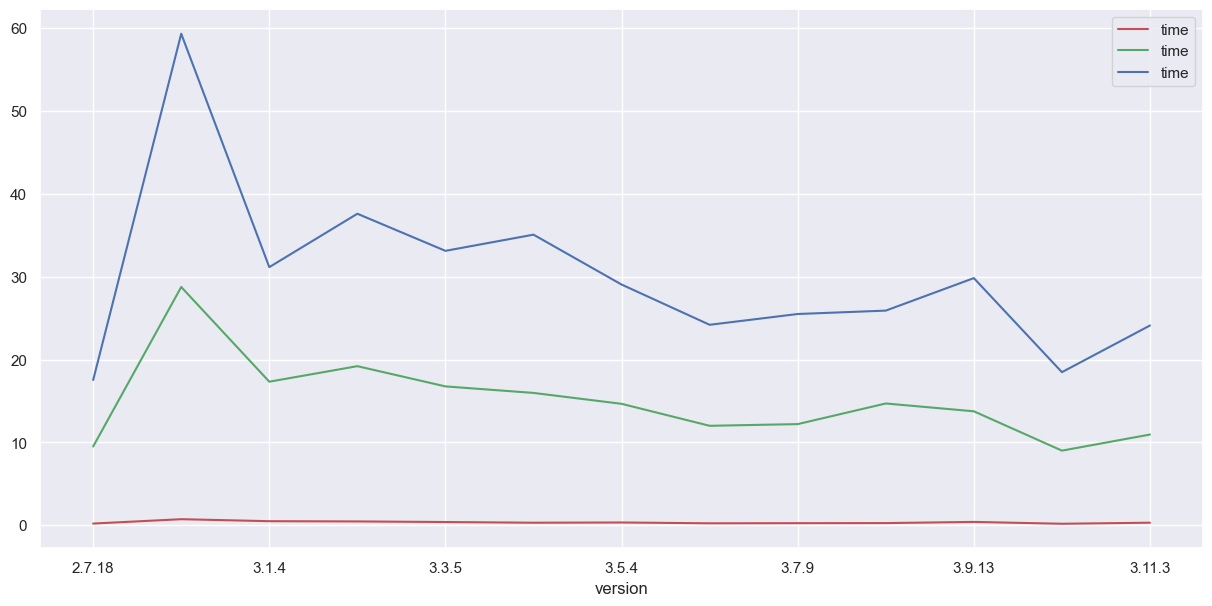

In [26]:
_, ax = plt.subplots(figsize=(15,7))

generator_results.loc[generator_results.function == 'generator_iter_10000'].plot(x='version', y='time', ax=ax, c='r')
generator_results.loc[generator_results.function == 'generator_iter_500000'].plot(x='version', y='time', ax=ax, c='g')
generator_results.loc[generator_results.function == 'generator_iter_1000000'].plot(x='version', y='time', ax=ax, c='b')

In [8]:
dict_results.version.unique

<bound method Series.unique of 0      2.7.18
1      2.7.18
2      2.7.18
3      2.7.18
4      2.7.18
5      2.7.18
6      2.7.18
7      2.7.18
8      2.7.18
9      2.7.18
10     2.7.18
11     2.7.18
12      3.0.1
13      3.0.1
14      3.0.1
15      3.0.1
16      3.0.1
17      3.0.1
18      3.0.1
19      3.0.1
20      3.0.1
21      3.0.1
22      3.0.1
23      3.0.1
24      3.1.4
25      3.1.4
26      3.1.4
27      3.1.4
28      3.1.4
29      3.1.4
30      3.1.4
31      3.1.4
32      3.1.4
33      3.1.4
34      3.1.4
35      3.1.4
36      3.2.5
37      3.2.5
38      3.2.5
39      3.2.5
40      3.2.5
41      3.2.5
42      3.2.5
43      3.2.5
44      3.2.5
45      3.2.5
46      3.2.5
47      3.2.5
48      3.3.5
49      3.3.5
50      3.3.5
51      3.3.5
52      3.3.5
53      3.3.5
54      3.3.5
55      3.3.5
56      3.3.5
57      3.3.5
58      3.3.5
59      3.3.5
60      3.4.4
61      3.4.4
62      3.4.4
63      3.4.4
64      3.4.4
65      3.4.4
66      3.4.4
67      3.4.4
68      3.4.4
69 